# **06. Visualización de Datos Avanzada.**




In [1]:
import pandas as pd
import plotly.express as px

In [5]:
pip install --upgrade plotly

     |████████████████████████████████| 23.9 MB 1.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [78]:
df= pd.read_csv('/content/drive/MyDrive/BEDU/analisis_datos_python_2021/COVID-19 Survey Student Responses-clean.csv')
df.head(3)

,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,Emotional connections,What you miss the most
0,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1.0,4,Increased,NO,Cooking,YES,YES,School/college
1,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0.0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0.0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling


In [79]:
df.isna().sum()

Region of residence                   0
Age of Subject                        0
Time spent on Online Class            0
Rating of Online Class experience     0
Medium for online class               0
Time spent on self study              0
Time spent on fitness                 0
Time spent on sleep                   0
Time spent on social media            0
Prefered social media platform        0
Time spent on TV                     13
Number of meals per day               0
Change in your weight                 0
Health issue during lockdown          0
Stress busters                        0
Time utilized                         0
Emotional connections                 0
What you miss the most                0
dtype: int64

In [80]:
df.shape

(1182, 18)

In [81]:
df['Time spent on TV'] = pd.to_numeric(df['Time spent on TV'], downcast='float', errors='coerce')
#df['Time spent on TV'] = df['Time spent on TV'].fillna(0)
df = df.dropna()

# Treemaps

In [82]:
df_treemap =df[['Medium for online class','Rating of Online Class experience']]
df_treemap.head()

,Medium for online class,Rating of Online Class experience
0,Laptop/Desktop,Good
1,Smartphone,Excellent
2,Laptop/Desktop,Very poor
3,Smartphone,Very poor
4,Laptop/Desktop,Good


In [83]:
df_treemap['count']=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [84]:
df_treemap

,Medium for online class,Rating of Online Class experience,count
0,Laptop/Desktop,Good,1
1,Smartphone,Excellent,1
2,Laptop/Desktop,Very poor,1
3,Smartphone,Very poor,1
4,Laptop/Desktop,Good,1
...,...,...,...
1177,Smartphone,Good,1
1178,Smartphone,Average,1
1179,Smartphone,Average,1
1180,Laptop/Desktop,Excellent,1


In [85]:
fig = px.treemap(df_treemap, path=['Medium for online class','Rating of Online Class experience'], values='count')

fig.show()

En nuestro treemap podemos observar que la mayor parte de los estudiantes que no seleccionaron una puntuación para el rating no utilizan ningún dispositivo para ver las clases en línea. En general, pareciera que carece de sentido decir que no tienes ningún medio para ver tu clase pero darle una buena puntuación.
Lo que haremos ahora es eliminar 'No medium' y visualizar el treemap nuevamente.

In [86]:
#df_filtered = df_treemap[~df_treemap['Medium for online class'].str.contains('No medium')]
df_filtered = df_treemap[~df_treemap['Medium for online class'].isin(['No medium','Any Gadget','Smartphone or Laptop/Desktop'])]

In [87]:
fig = px.treemap(df_filtered, path=['Medium for online class','Rating of Online Class experience'], values='count')

fig.show()

# Variaciones de scaterplots

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [89]:
sns.set_style("white")

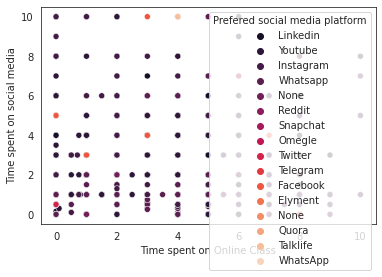

In [91]:
sns.scatterplot(x=df['Time spent on Online Class'],y=df['Time spent on social media'], hue=df['Prefered social media platform'], palette="rocket");

Podemos observar que WhatsApp se repite pero los encuestados escribieron de forma diferente sus respuestas. Procedamos a solucionarlo y visualicemos las 4 redes sociales preferidas por los alumnos.

In [92]:
df['Prefered social media platform'] = df['Prefered social media platform'].str.replace('Whatsapp','WhatsApp')

Ahora hacemos un conteo de los usuarios por cada red social para seleccionar las más utilizadas por la población muestra.

In [93]:
df['Prefered social media platform'].value_counts()

Instagram    350
WhatsApp     333
Youtube      308
Linkedin      61
Facebook      52
Twitter       27
None          17
Snapchat       8
Reddit         5
Telegram       3
Quora          1
Omegle         1
Talklife       1
None           1
Elyment        1
Name: Prefered social media platform, dtype: int64

El conteo nos indica que las tres plataformas que se distinguen notoriamente del resto son Instagram, YouTube y WhatsApp.

In [94]:
df_social_media = df[df['Prefered social media platform'].isin(['Instagram','WhatsApp','Youtube'])]

La siguiente gráfica parece sugerir que WhatsApp se emplea en todo el rango de edades del set de datos y que el tiempo que los usuarios pasan en esta red suele ser de entre 0 y 2 horas. Es conveniente hacer nuestro análisis por separado para las plataformas.

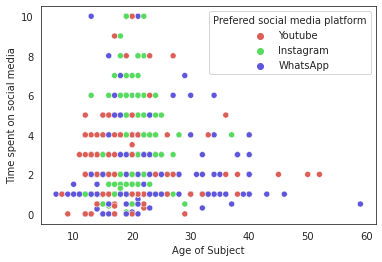

In [95]:
sns.scatterplot(x=df_social_media['Age of Subject'],y=df_social_media['Time spent on social media'], hue=df_social_media['Prefered social media platform'], palette="hls");

In [96]:
df_yout = df[df['Prefered social media platform']=='Youtube']
df_insta = df[df['Prefered social media platform']=='Instagram']
df_whats = df[df['Prefered social media platform']=='WhatsApp']

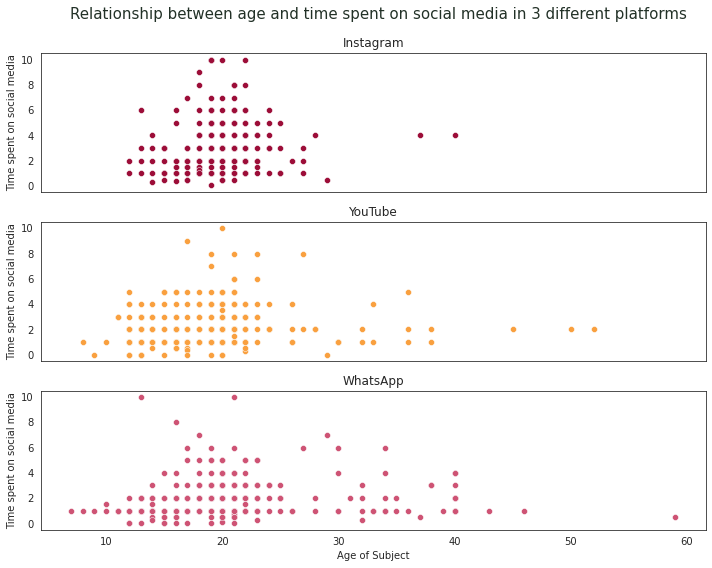

In [97]:
palette = ["#223127","#9c0d38","#F9A03F","#ce5374"]

fig = plt.figure(figsize=(10, 8))
axes = fig.subplots(3, sharex=True, sharey=True)

sns.scatterplot(x=df_insta['Age of Subject'], y=df_insta['Time spent on social media'], ax=axes[0], color=palette[1])
sns.scatterplot(x=df_yout['Age of Subject'], y=df_yout['Time spent on social media'], ax=axes[1], color=palette[2])
sns.scatterplot(x=df_whats['Age of Subject'], y=df_whats['Time spent on social media'], ax=axes[2], color=palette[3]);

axes[0].set_title('Instagram')
axes[1].set_title('YouTube')
axes[2].set_title('WhatsApp')

fig.suptitle('Relationship between age and time spent on social media in 3 different platforms', fontsize=15, c=palette[0], x=0.53)

plt.tight_layout()
plt.subplots_adjust(top=0.9)



*   El tiempo que los usuarios pasan en redes sociales disminuye conforme a su edad.
*   Los usuarios pasan una menor cantidad de horas en WhatsApp en contraste con Facebook e Instagram.
*   El sector de usuarios que prefiere Instagram se encuentra muy bien delimitado entre los 10 y 30 años.
*   Los usuarios de entre 15 y 20 años pasan muchas más horas en Instagram o Youtube que el resto.





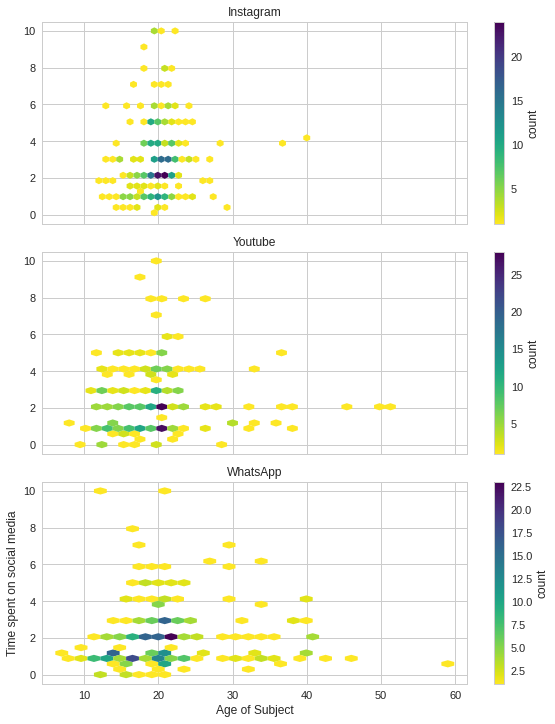

In [215]:
plt.style.use("seaborn-whitegrid")

fig = plt.figure(figsize=(8, 10))
(ax0, ax1, ax2) = fig.subplots(3,1, sharex=True, sharey=True)

c = ax0.hexbin(df_insta['Age of Subject'], df_insta['Time spent on social media'], gridsize=30, cmap='viridis_r',
               mincnt=1, edgecolors="none")
ax0.set_title("Instagram")
cb = fig.colorbar(c, ax=ax0)
cb.set_label('count')

c = ax1.hexbin(df_yout['Age of Subject'], df_yout['Time spent on social media'], gridsize=30, cmap='viridis_r',
               mincnt=1, edgecolors="none")
ax1.set_title("Youtube")
cb = fig.colorbar(c, ax=ax1)
cb.set_label('count')

c = ax2.hexbin(df_whats['Age of Subject'], df_whats['Time spent on social media'], gridsize=30, cmap='viridis_r',
               mincnt=1, edgecolors="none")
ax2.set_title("WhatsApp")
cb = fig.colorbar(c, ax=ax2)
cb.set_label('count')

fig.tight_layout()
plt.xlabel('Age of Subject')
plt.ylabel('Time spent on social media')
plt.show()

# Gráficos de barras apiladas

In [132]:
df_connected = df.groupby(['Rating of Online Class experience','Emotional connections'])['Time spent on self study'].mean()
df_connected

Rating of Online Class experience  Emotional connections
Average                            NO                       3.087963
                                   YES                      2.836861
Excellent                          NO                       2.676471
                                   YES                      3.280247
Good                               NO                       3.011628
                                   YES                      2.813514
No rating                          NO                       4.285714
                                   YES                      2.676471
Poor                               NO                       3.900000
                                   YES                      3.050000
Very poor                          NO                       2.637500
                                   YES                      2.973684
Name: Time spent on self study, dtype: float64

In [137]:
value_counts = df_connected.unstack(1)
value_counts = value_counts.fillna(0)
#value_counts['Sum']=value_counts['NO']+value_counts['YES']
value_counts = value_counts.sort_values(by='NO', ascending=False)

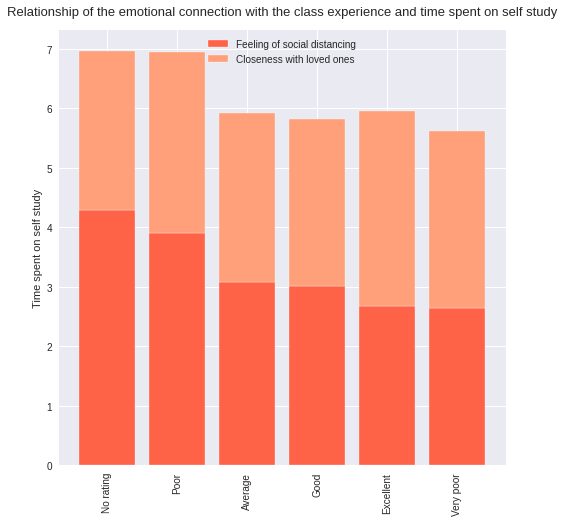

In [138]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()

plt1 = ax.bar(value_counts.index, value_counts['NO'],
              color='tomato')
plt2 = ax.bar(value_counts.index, value_counts['YES'], bottom= value_counts['NO'],
              color='lightsalmon')

ax.set_ylabel('Time spent on self study')
ax.set_title('Relationship of the emotional connection with the class experience and time spent on self study', fontsize=13, pad=15);
plt.legend((plt1[0], plt2[0]),('Feeling of social distancing','Closeness with loved ones'), loc='upper center');
plt.xticks(rotation=90);
#ax.set_ylim(0, 4500);

Aquellos que dedican más tiempo al autoestudio y tienen una mala experiencia con las clases online se sienten más distanciados de sus seres queridos. Recordemos que todos aquellos en la categoría 'No rating' no cuentan con un dispositivo para tomar clases en línea; esto cuenta como una mala experiencia.

Podríamos inferir que el motivo por el que la categoría 'Very poor' tiene menor distanciamiento social es porque prefiere ignorar las clases y estudiar por su cuenta, de esta forma puede pasar más tiempo con sus seres queridos.